In [1]:
%conda install matplotlib -y

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# 7회차 과제
목표: 정규성 검정 및 T 검정 수행하기.  
(수업 자료의 `과제 연계 실습` 참고)

## 선택형 문제

1. P-value란 귀무 가설을 참으로 가정하고 표본의 결과가 실제로 나타날 확률을 계산한 것이다.

2. P-value가 낮다는 것은 귀무 가설이 참일 때 지금과 같은 결과가 관측될 확률이 낮다는 것을 의미한다.

3. P-value가 높으면 귀무 가설은 채택히고 대립 가설은 기각한다.

## 정규성 검정

주어진 분포가 정규 분포를 따르는 모집단으로부터 추출되었는지 올바른 분석법을 사용해 검정하시오.

In [7]:
from scipy import stats
q1 = stats.cauchy().rvs(8000)
# generate random sample 'q1' from cauchy distribution
# q1 now includes 8000 random numbers

In [8]:
# Jaque-Bera Test

# 귀무 가설(H0): 데이터가 정규 분포를 따른다
# 대립 가설(H1): 데이터가 정규 분포를 따르지 않는다
test_stat, pv = stats.jarque_bera(q1)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 1565150885.772663, p-value: 0.0


p-value가 0이므로 귀무 가설 기각, 대립 가설 채택.

데이터는 정규 분포를 따르지 않음

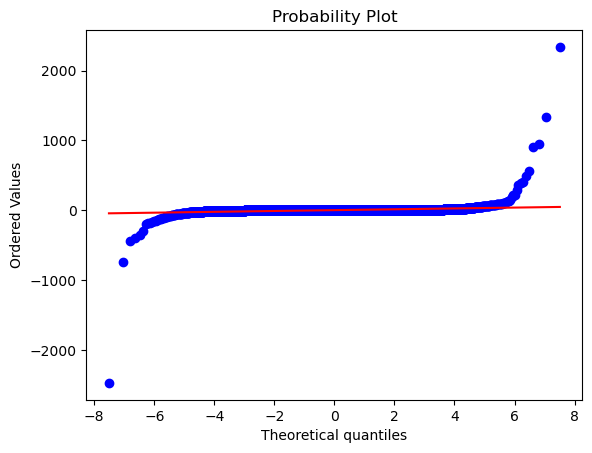

In [16]:
# Q-Q Plot

fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(q1, dist=stats.norm(0, 2), plot=ax1)

끝부분에서 차이가 나기 때문에 데이터는 정규 분포를 따르지 않는다

In [17]:
# Kolmogorov-Smirnov Test (표본 수 = 8000이므로 2000 이상)

# 귀무 가설(H0): 데이터가 정규 분포를 따른다
# 대립 가설(H1): 데이터가 정규 분포를 따르지 않는다

test_stat, pv = stats.kstest(q1, 'norm', args=(q1.mean(), q1.var() ** 0.5))
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 0.4031035541883544, p-value: 0.0


p-value가 0이므로 귀무 가설 기각, 대립 가설 채택.

데이터는 정규 분포를 따르지 않음

## T 검정

주어진 상황에 맞는 적절한 t 검정을 수행하시오.

### 상황 1. 실험군과 대조군

신약의 효과를 확인하기 위해 희귀한 뇌 질환, '웨스트 증후군'을 겪고 있는 100명의 환자를 모집하였다.  
연구자는 그 중 50 명에게는 진짜 약을 투여하고 나머지 50 명에게는 위약을 투여한 뒤 차도를 지켜보았다.  
주어진 데이터가 각 집단에서 5명의 표본을 추출한 결과라고 할 때, 정말로 이 신약이 효과가 있는지 통계적 방법으로 검정하시오.

In [18]:
x = np.linspace(1, 6, 5)
real = stats.uniform(0.4, 0.3).rvs(size=5)
placebo = stats.uniform(0.1, 0.3).rvs(size=5)

- 귀무 가설(H0): 쌍을 이루는 두 모집단의 평균은 같다
- 대립 가설(H1): 쌍을 이루는 두 모집단의 평균은 다르다

실제 약을 투여하였을 때 표본 평균: 0.5685867477584804
위약을 투여하였을 때 표본 평균: 0.22761559994629166


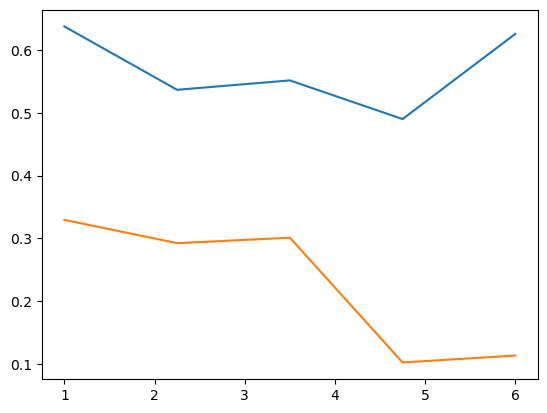

In [19]:
# 그래프
plt.plot(x,real)
plt.plot(x,placebo)
print(f"실제 약을 투여하였을 때 표본 평균: {real.mean()}")
print(f"위약을 투여하였을 때 표본 평균: {placebo.mean()}")

In [20]:
# T-Test
test_stat, pv = stats.ttest_rel(real,placebo)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 6.800699008712125, p-value: 0.0024422591237360353


### 상황 2. 중간고사 난이도

서로 인접한 두 고등학교의 중간고사 난이도가 유사한지 판단하기 위해, 각 학교에서 10명씩을 골라 이번 수학시험 점수를 물어보았다.  
이를 이용해 두 학교의 중간고사 난이도가 비슷했는지 통계적 방법으로 검정하시오.

In [21]:
x = np.linspace(1, 11, 10)
school_A = stats.uniform(65, 0.01).rvs(size=10)
school_B = stats.uniform(63, 10).rvs(size=10)

- 귀무 가설(H0): 독립된 두 모집단의 평균은 같다
- 대립 가설(H1): 독립된 두 모집단의 평균은 다르다

A 고등학교 표본 평균: 65.00518230163762
B 고등학교 표본 평균: 68.87414848807487


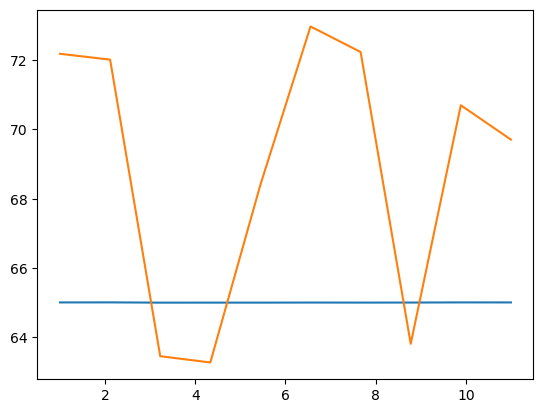

In [22]:
# 그래프
plt.plot(x,school_A)
plt.plot(x,school_B)
print(f"A 고등학교 표본 평균: {school_A.mean()}")
print(f"B 고등학교 표본 평균: {school_B.mean()}")

In [25]:
# T-Test
test_stat, pv = stats.ttest_ind(school_A, school_B)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: -3.1096691871127393, p-value: 0.0060499630946880606


## 카이제곱 검정

어떤 식당에서 2027년 한 해 동안 요일별 강우 횟수와 점심 시간 만석 횟수를 함께 조사하였다.  
점심 시간 만석 여부와 강우 여부 사이의 연관성을 통계적 방법으로 검정하시오.

In [10]:
from scipy.stats import chi2_contingency

fullrainy = pd.DataFrame({'Full on sunny day': [18, 8, 6, 4, 5, 7, 20], 'Full on rainy day': [10, 3, 2, 3, 4, 5, 12]}, index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
display(fullrainy)

,Full on sunny day,Full on rainy day
Mon,18,10
Tue,8,3
Wed,6,2
Thu,4,3
Fri,5,4
Sat,7,5
Sun,20,12


In [11]:
exp = int(np.sum(fullrainy['Full on rainy day']) / 7)
fullrainy['exp'] = [exp, exp, exp, exp, exp, exp, exp]
display(fullrainy)

,Full on sunny day,Full on rainy day,exp
Mon,18,10,5
Tue,8,3,5
Wed,6,2,5
Thu,4,3,5
Fri,5,4,5
Sat,7,5,5
Sun,20,12,5


귀무 가설 (H0):\
대립 가설 (H1): 

In [12]:
res = chisquare(fullrainy['# rainy days'], fullrainy['exp'])
print(f"Test statistic is {res.statistic}, and the p-value is {res.pvalue}")

NameError: name 'chisquare' is not defined

카이제곱 부분만 끝내지 못했습니다...